In [1]:
###  USE NEURAL NETWROK TO PREDICT CANCELLATIONS IN HOTEL RESERVATION (WITH HOTEL CANCELLATIONS DATASETS)

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [2]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,7,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,7,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,7,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,7,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,7,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [4]:
X_train

array([[-0.64634973, -0.59998984, -0.31875654, ...,  0.        ,
         1.        ,  0.        ],
       [-0.6275988 ,  0.20764029,  0.36444197, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.66001462,  0.20764029,  1.04764048, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.97560569,  0.64816581,  1.50310616, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27133114, -1.62788273, -1.34355431, ...,  0.        ,
         1.        ,  0.        ],
       [-0.91823821,  1.3089541 , -1.68515356, ...,  0.        ,
         1.        ,  0.        ]])

In [5]:
##### (1.)   DEFINE THE MODEL

## The model we'll use this time will have both batch normalization and dropout layers. 
## To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.


from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
    
])


In [6]:
###(2)              ADD OPTIMIZAER, LOSS AND METRIC 

## Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/200
175/175 [==============================] - 5s 26ms/step - loss: 0.4865 - binary_accuracy: 0.7708 - val_loss: 0.4329 - val_binary_accuracy: 0.8009
Epoch 2/200
175/175 [==============================] - 4s 22ms/step - loss: 0.4241 - binary_accuracy: 0.7996 - val_loss: 0.4032 - val_binary_accuracy: 0.8134
Epoch 3/200
175/175 [==============================] - 3s 19ms/step - loss: 0.4078 - binary_accuracy: 0.8090 - val_loss: 0.3942 - val_binary_accuracy: 0.8159
Epoch 4/200
175/175 [==============================] - 3s 19ms/step - loss: 0.4018 - binary_accuracy: 0.8127 - val_loss: 0.3901 - val_binary_accuracy: 0.8172
Epoch 5/200
175/175 [==============================] - 3s 20ms/step - loss: 0.3965 - binary_accuracy: 0.8153 - val_loss: 0.3861 - val_binary_accuracy: 0.8208
Epoch 6/200
175/175 [==============================] - 4s 21ms/step - loss: 0.3910 - binary_accuracy: 0.8175 - val_loss: 0.3852 - val_binary_accuracy: 0.8238
Epoch 7/200
175/175 [==============================]

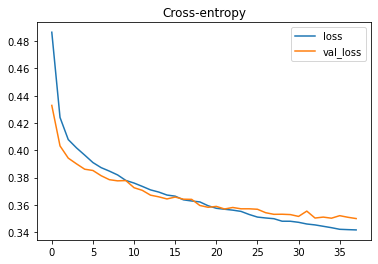

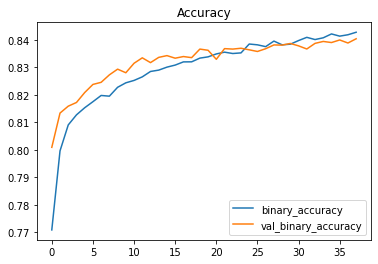

In [7]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [8]:
model.save('hotel.h5')

In [9]:
model.evaluate(X_train, y_train)

2799/2799 [==============================] - 4s 2ms/step - loss: 0.3192 - binary_accuracy: 0.8533


[0.31924930214881897, 0.8532978892326355]